In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# Load the dataset
df = pd.read_csv('Uber.csv')

In [19]:
# Data Preprocessing
print(df.head())

  dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537


In [20]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [21]:
# Extract additional time-based features (Year, Month, Day, Day of the Week, etc.)
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day
df['Day_of_Week'] = df['date'].dt.dayofweek  # Monday=0, Sunday=6

In [22]:
# Check for missing or duplicate values and handle them
df = df.drop_duplicates()  # Remove duplicates
df = df.dropna()  # Remove rows with missing values

In [23]:
# Feature Engineering - Add ratio of active vehicles to trips (a new feature that may be useful)
df['vehicles_to_trips'] = df['active_vehicles'] / df['trips']

In [24]:
# Check the updated dataframe
print(df.head())

  dispatching_base_number       date  active_vehicles  trips  Year  Month  \
0                  B02512 2015-01-01              190   1132  2015      1   
1                  B02765 2015-01-01              225   1765  2015      1   
2                  B02764 2015-01-01             3427  29421  2015      1   
3                  B02682 2015-01-01              945   7679  2015      1   
4                  B02617 2015-01-01             1228   9537  2015      1   

   Day  Day_of_Week  vehicles_to_trips  
0    1            3           0.167845  
1    1            3           0.127479  
2    1            3           0.116481  
3    1            3           0.123063  
4    1            3           0.128762  


In [25]:
# Exploratory Data Analysis (EDA)

# Check the correlation matrix
correlation = df[['active_vehicles', 'trips', 'vehicles_to_trips']].corr()

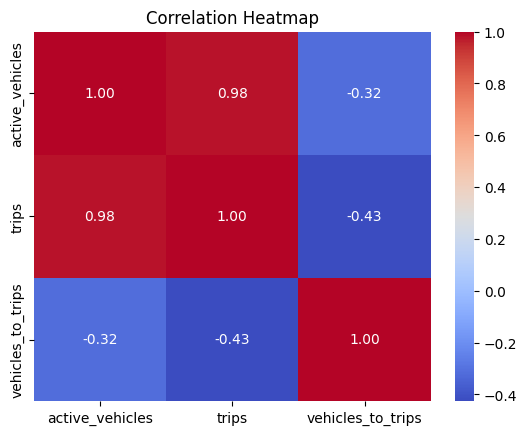

In [26]:
# Plotting correlation heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Feature selection for model building (Using 'Month', 'Day_of_Week', and 'vehicles_to_trips' as features)
X = df[['Month', 'Day_of_Week', 'vehicles_to_trips']]
y = df['trips']

In [28]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Model building (Linear Regression)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predicting on the test set
y_pred = model.predict(X_test)

In [31]:
# Model evaluation (Mean Squared Error and R2 Score)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 94209858.99782626
R2 Score: 0.1263082027489305


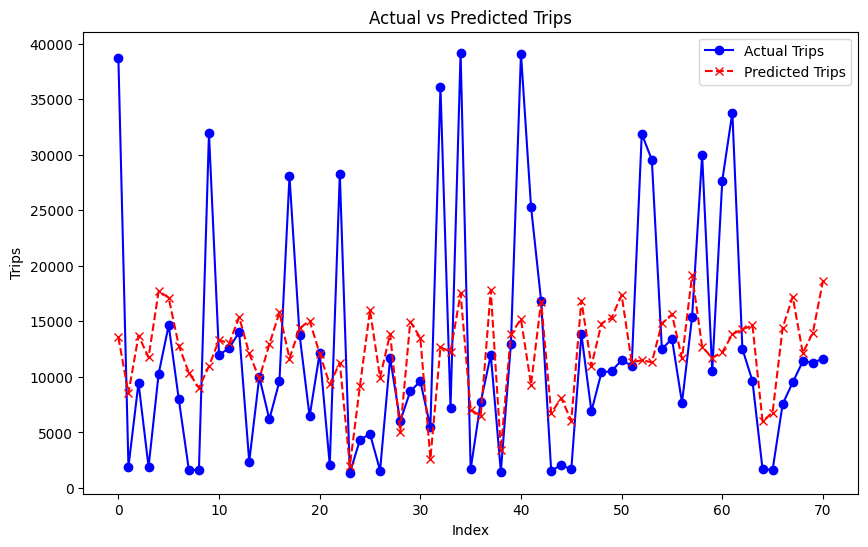

In [33]:
# Visualization: Actual vs Predicted trips
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Trips', color='blue', linestyle='-', marker='o')
plt.plot(y_pred, label='Predicted Trips', color='red', linestyle='--', marker='x')
plt.title('Actual vs Predicted Trips')
plt.xlabel('Index')
plt.ylabel('Trips')
plt.legend()
plt.show()

In [35]:
# Save the Model (Optional)
import joblib
joblib.dump(model, 'uber_trip_model.pkl')

['uber_trip_model.pkl']

In [36]:
# Save the Predictions to a CSV
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('uber_trip_predictions.csv', index=False)